<center>  </center>
<center><h1>Numerical Analysis</h1></center>
<center><h2>ANN0001 2023/1</h2></center>
<center><h3>Prof. Fernando Deeke Sasse - CCT, UDESC</h3></center>    
<center><h2>Computacional Arithmetics</h2> </center>

## 1. A brief introduction to number systems in computing

The objective of this introduction is to motivate the student to understand the functioning of a computational floating point system, which in almost all numerical systems is carried out directly on the processor, in binary format. It is called hardware floating-point arithmetic. It is possible to perform numerical calculations in the decimal system, with arbitrary precision (software floating point arithmetic). This is typical in computer algebraic systems like Maple and Mathematica, in Matlab's symbolic module. However, the price for greater accuracy and error-free binary-to-decimal conversion is computation time. Hardware floating point arithmetic is much faster. The approach here is basic, but it will give an idea about the origin of some possible numerical errors in computer numerical calculations, which originate from binary-decimal conversion and finite precision used in hardware arithmetic. 

Let's do a simple experiment in Python consisting of the sum of two large numbers:

In [57]:
1e15+1-1e15

1.0

As expected, the result is 1. However, let's now take numbers an order of magnitude higher:

In [58]:
1e16+1-1e16

0.0

On the other hand,

In [59]:
(1e16-1e16)+1

1.0

This shows that we can run into problems in computing when we add numbers with very different magnitudes. This is not a problem with Python, but with the floating-point arithmetic implemented in the computer's processor. Let's look at another example.

Mathematically we know that equality holds

$$
\frac{1}{\sqrt{1+x}-\sqrt{x}} = \sqrt{1+x}+\sqrt{x}
$$

Let's examine this identity computationally. We define the function (which mathematically is identically zero):

$$
f(x) = \frac{1}{\sqrt{1+x}-\sqrt{x}} - \left(\sqrt{1+x}+\sqrt{x}\right)
$$


In [60]:
from math import sqrt

In [61]:
def f(x):
    f1 = sqrt(1+x)+sqrt(x)
    f2 = sqrt(1+x)-sqrt(x)
    return 1/f2-f1

Let us evaluate this function for different values of $x$: 

In [62]:
f(1.)

-4.440892098500626e-16

In [63]:
f(0)

0.0

When $x$ is relatively large, we start to see problems:

In [64]:
f(1e8)

-0.00027235326342633925

This number is no longer so close to zero. When $x$ gets even bigger the problems get catastrophically worse:

In [65]:
f(1e+15)

-9558462.003367603

In [66]:
f(1e+16)

ZeroDivisionError: float division by zero

In this last evaluation the result was an error caused by division by zero.

## 2. Floating point systems in general

In general, floating point numbers are represented as follows:

$$
\pm 1.m \times 2^p
$$

where $m$ is the mantissa and $p$ is the exponent. In general, in so-called normalized floating point systems the mantissa has the following restriction on values:

$$
\frac{1}{2} \leq m \leq 1\,.
$$

In the computer, the representation is made by means of binary numbers $0$ or $1$. A mantissa is therefore characterized by a sequence of $N$ binary digits:

$$
m = (\mu_1 \mu_2 \cdots \mu_N)_2.
$$

This notation has a similar meaning to what we normally use:

$$
m= \mu_1 \times 2^{-1} +\mu_2 \times 2^{-1} +\cdots \cdots \mu_N\times 2^{-N}
$$

The exponential part is an integer with $E$ number of digits, characterized by $E+1$ bits:

$$
p = (\nu_0 |\nu_1 \nu_2 \cdots \nu_{E})_2\,,
$$

where $\nu_0$ is the sign bit, with 1 corresponding to the negative sign. In other words,

$$
p = \pm (\nu_{E}+\nu_{E-1}\times 2+\cdots + \nu_1 \times 2^E)
$$



A binary word, representing a number is represented by a sequence of $N+E+2$ bits:

$$
[s|\mu_1 \mu_2 \cdots \mu_N|\nu_0| \nu_1 \nu_2 \cdots \nu_{E}],
$$

where $s$ is a sign bit, and $s=1$ corresponding to a negative number.

We can designate a binary floating point system by $F(2,N,E)$. For example in the system $F(2,5, 3)$ the largest number in magnitude is

$$
(1.1 1 1 1 1)_2 \times 2^{(1 1 1)_2} = (1+1\times 2^{-1}+1\times 2^{-2}+1\times 2^{-3}+1\times 2^{-4}+1\times 2^{-5})\times 2^7=252.
$$

The smallest number in magnitude is given by

$$
(1.0 0 0 0 0)_2 \times 2^{-(1 1 1)_2} = 1\times 2^{-7}=\frac{1}{128}. = 0.0078125\,.
$$

The region corresponding to the interval $(-0.0078125, 0.0078125)$ is called the underflow region, while the region with numbers greater than $252$ and less than $-252$ is called the overflow region.

A typical number in this system is represented by a 10-bit binary word:

$$ 
[s|\mu_1 \mu_2 \mu_3 \mu_5 \mu_5|\nu_0| \nu_1 \nu_2\nu_3]
$$

Thus, the binary word $[1| 01011 |1|011]$ corresponds to the number

$$
(-1)^1(1+2^{-2}+2^{-4}+2^{-5})\times 2^{-3}= \frac{43}{256} = 0.16796875.
$$

## 3. Normalized floating point system

We can have a normalized number system. In this case the exponent sign bit is built into the number and a bias is introduced, so that the highest binary exponential for normal numbers is $[1 1 \cdots 10]$ and the lowest is $[0 0 \cdots 01] $. The exponents corresponding to $[11\cdots 11]$ and $[0 0 \cdots 0 0]$ are associated with special numbers.

In the previous example, with $F(2,5, 3)$, the binary word in the corresponding normalized system is now denoted by

$$ 
[s|\mu_1 \mu_2 \mu_3 \mu_5 \mu_5| \nu_1 \nu_2\nu_3 \nu_4]\,,
$$

with bias $-7$, for example. The largest exponent for normal numbers corresponds to $[1 1 1 0]$, biased by $-7$ resulting in

$$
(1 1 1 0)_2 -7 = 2^3+2^2+2 - 7 = 7
$$

and the smallest exponent for normal numbers corresponds to $[0 0 0 1]$ biased by $-7$, resulting in

$$
(0 0 0 1)_2 -7 = 1 - 7 = -6
$$

The exponents corresponding to $[1111]$ and $[0 0 0 0]$ are reserved for special numbers. Now, the binary word $[1| 01011 |0100]$ matches the number

$$
(-1)^1(1+2^{-2}+2^{-4}+2^{-5})\times 2^{2^2-7}= \frac{43}{32} \times 2^{-3}= \frac{43}{256}
$$

The highest magnitude number in this now normalized system is still of the form

$$
(1.1 1 1 1 1)_2 \times 2^7=252.
$$

The smallest magnitude number in this system is now of the form

$$
(1.1 1 1 1 1)_2 \times 2^{-6} =\frac{63}{2048} \approx 0.030\,.
$$

Note that when talking about precision in the floating point system, it is correct to mention binary precision, that is, the number of bits in the mantissa. To convert this precision to the decimal system we must solve the equation
$2^6=10^x$, resulting in $x \approx 1.8$, which shows that numbers from this system in the decimal system cannot be well represented, in general, with more than two significant digits. Note, however, that the number of significant bits of the mantissa is 5, since the integer part is already predefined. 

## 4.  Determining all numbers of a floating point system

Let's consider the unnormalized binary system of the form $F(2,4,3)$. Determine all numbers representable exactly in this system, in decimal form.  

In [67]:
import sympy
from sympy.utilities.iterables import multiset_permutations

Let us initially find all possible combinations for the mantissa:

In [68]:
t1 = [0,1,0,0]
t2 = [1,1,0,0]
t3 = [1,1,1,0]
L4 = [1,1,1,1]
L5 = [0,0,0,0]

In [69]:
L1 = list(multiset_permutations(t1))
L1

[[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]

In [70]:
L2 = list(multiset_permutations(t2))
L2

[[0, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 0]]

In [71]:
L3 = list(multiset_permutations(t2))
L3

[[0, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 0]]

Let's concatenate the lists to get all the combinations:

In [72]:
L = L1+L2+L3+[L4]+[L5]
L

[[0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 0],
 [0, 0, 1, 1],
 [0, 1, 0, 1],
 [0, 1, 1, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [1, 1, 0, 0],
 [1, 1, 1, 1],
 [0, 0, 0, 0]]

We have 18 elements in this list:

In [73]:
n = len(L)
n

18

In [74]:
import numpy as np

In [75]:
D = np.zeros(n)
D

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

Each sublist L[i] , i =1:n, contains 4 elements. We convert each L[i], added to 1, to decimal form: 

In [76]:
for i in range(0,n):
    D[i]= 1+L[i][0]*2**(-1)+L[i][1]*2**(-2)+L[i][2]*2**(-3)+L[i][3]*2**(-4)

The 18 numbers are given by:

In [77]:
D

array([1.0625, 1.125 , 1.25  , 1.5   , 1.1875, 1.3125, 1.375 , 1.5625,
       1.625 , 1.75  , 1.1875, 1.3125, 1.375 , 1.5625, 1.625 , 1.75  ,
       1.9375, 1.    ])

Let us now consider the exponential part $2^p$. As the system is not normalized, the exponent has a maximum magnitude $(111)_2=3$, so that $-3\leq p \leq 3$. Again, we form sublists:

In [78]:
N1 = D*2**(-3)
N2 = D*2**(-2)
N3 = D*2**(-1)
N4 = D*2**(0)
N5 = D*2**(1)
N6 = D*2**(2)
N7 = D*2**(3)

We now concatenate the lists:

In [79]:
NN = np.concatenate((N1,N2,N3,N4,N5,N6,N7))
NN

array([ 0.1328125,  0.140625 ,  0.15625  ,  0.1875   ,  0.1484375,
        0.1640625,  0.171875 ,  0.1953125,  0.203125 ,  0.21875  ,
        0.1484375,  0.1640625,  0.171875 ,  0.1953125,  0.203125 ,
        0.21875  ,  0.2421875,  0.125    ,  0.265625 ,  0.28125  ,
        0.3125   ,  0.375    ,  0.296875 ,  0.328125 ,  0.34375  ,
        0.390625 ,  0.40625  ,  0.4375   ,  0.296875 ,  0.328125 ,
        0.34375  ,  0.390625 ,  0.40625  ,  0.4375   ,  0.484375 ,
        0.25     ,  0.53125  ,  0.5625   ,  0.625    ,  0.75     ,
        0.59375  ,  0.65625  ,  0.6875   ,  0.78125  ,  0.8125   ,
        0.875    ,  0.59375  ,  0.65625  ,  0.6875   ,  0.78125  ,
        0.8125   ,  0.875    ,  0.96875  ,  0.5      ,  1.0625   ,
        1.125    ,  1.25     ,  1.5      ,  1.1875   ,  1.3125   ,
        1.375    ,  1.5625   ,  1.625    ,  1.75     ,  1.1875   ,
        1.3125   ,  1.375    ,  1.5625   ,  1.625    ,  1.75     ,
        1.9375   ,  1.       ,  2.125    ,  2.25     ,  2.5   

Let's sort the list in ascending order to visualize it in a graph: 

In [80]:
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

Let's eliminate the repeated elements:

In [81]:
Ns = selection_sort(list(set(NN)))
Ns

[0.125,
 0.1328125,
 0.140625,
 0.1484375,
 0.15625,
 0.1640625,
 0.171875,
 0.1875,
 0.1953125,
 0.203125,
 0.21875,
 0.2421875,
 0.25,
 0.265625,
 0.28125,
 0.296875,
 0.3125,
 0.328125,
 0.34375,
 0.375,
 0.390625,
 0.40625,
 0.4375,
 0.484375,
 0.5,
 0.53125,
 0.5625,
 0.59375,
 0.625,
 0.65625,
 0.6875,
 0.75,
 0.78125,
 0.8125,
 0.875,
 0.96875,
 1.0,
 1.0625,
 1.125,
 1.1875,
 1.25,
 1.3125,
 1.375,
 1.5,
 1.5625,
 1.625,
 1.75,
 1.9375,
 2.0,
 2.125,
 2.25,
 2.375,
 2.5,
 2.625,
 2.75,
 3.0,
 3.125,
 3.25,
 3.5,
 3.875,
 4.0,
 4.25,
 4.5,
 4.75,
 5.0,
 5.25,
 5.5,
 6.0,
 6.25,
 6.5,
 7.0,
 7.75,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 12.0,
 12.5,
 13.0,
 14.0,
 15.5]

In [82]:
t=np.linspace(0,len(Ns)-1,len(Ns))

In [83]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'N')

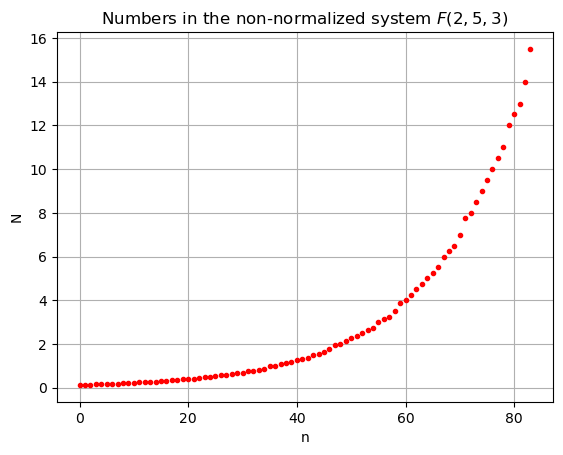

In [110]:
plt.plot(t,Ns,'r.')
plt.grid(True)
plt.title("Numbers in the non-normalized system $F(2,5,3)$");
plt.xlabel('n')
plt.ylabel('N')

Note that zero is not defined in the above set. Let's do some calculations involving representable numbers in this system. Let's take the sum of two decimal numbers with exact representation in the system: $2+2.75 = 4.75$. This is a number that belongs to the system. In fact, $4.75 = (100.11)_2= (1.0011)_2 2^{-2}$ On the other hand $2+2.125=4.125$ does not belong to the system. In practice such numbers could be approximated to the nearest system number. In this case the system number would be $4.25$. 

## 5. Machine epsilon

The smallest number that added to 1 gives a result other than 1 is called machine epsilon, $\epsilon_m$.
Let's consider normalized floating-point system $F(2,7,7)$, bias $-63$. The smallest number in the system is given by

$$
(1,000 000 0)_2^{1-63} \approx 10^{-19}
$$
On the other hand, the smallest number that added to 1 results in a number different from 1 is given by
$$
\epsilon_m = (0.00000001)_2 = 1.0000000 \times 2^{-8}= \frac{1}{256}
$$

The lowest system number depends on how many bits can be stored in the exponent, whereas $\epsilon_m$ depends on how many bits are in the mantissa.


## 6. The IEEE 754 standard

When in 1985 Intel decided to introduce a floating point coprocessor for its new 8086 microprocessor, named 8087 FPU, a new binary floating point system was introduced (Kahn, Coonan, Stone), being soon adopted as a standard by the IEEE (Institute for Electrical and Electronic Engineers). We will consider formats called simple, double (used in most computer systems). More details can be found in references [1-6].  

### 6.1 Simple format

The IEEE 754 simple format, called binary32 or single precision, called "float" in C, is defined such that each number is stored in a 32-bit word (4 bytes) in the following form:

$$
(-1)^s 2^{E-127}\left(1+\sum_{i=1}^{23}2^{-i}\right),
$$

where the bit distribution is given by

<img src="IEEE-32bit.png" style="height:110px">

Let's examine the exponent. Normal numbers in plain format have the maximum exponential part $(1111 1110)_2=254$ and minimum exponential part $(0000 0001)_2=1$. Therefore, as the bias is $-127$, the exponent of the number is limited as follows:

$$
-126<E-127<127\,.
$$

The number of significant digits of the fractional part of the mantissa, representable in decimal base is given by solving the equation $2^{23}=10^x$, which results in $x= \log_{10}(2^{23}) = 23 \log_{10}2\approx 6.9$, ie approximately less than 8 significant digits. In practice, incorporating the integer part, we will have 8 digits presented to the user, but not all of them will be significant. In this case, it is safe to present only 6 significant decimal digits. The simple format is not available in Python, although it is in C, C++, Fortran and Matlab, for example.

The largest normalized (positive) number of this representation is given by
$[0] [1111\, 1110] [1] . [1111\, 1111 \,1111 \,1111 \,1111\, 111]$, that is,

In [85]:
s=0
for i in range(1,23):
    s += 2**(-i)
n = (1+s)*2**(127)
print(n)

3.4028232635611926e+38


This means that the largest number in single precision is $3.402823 \times 10^{38}$.

The smallest positive normal number in single precision has the form $[0] [0000\, 0001] [1] . [0000\, 0000\, 0000\, 0000 \,0000 \,000]$, that is, 

In [86]:
2**(-126)

1.1754943508222875e-38

This means that the largest number in single precision is $1.175494 \times 10^{-38}$.

Since $(128)_2 = (1000 000)_2$, the machine epsilon is $[0] [0100\,0000] [1] . [0000\, 0000\, 0000\, 0000 \,0000 \,001]$, that is,

In [87]:
epsilon = 2**(-23)
epsilon

1.1920928955078125e-07

Therefore, $\epsilon_m = 1.192093 \times 10^{-7}$.

Zero is not represented directly, due to the intrinsic bit that always has a value of 1. The special floating point values allowed in the IEEE 754, binary32 standard are summarized below:

<img src="IEEE-32bit_especiais.png" style="height:160px">

### 6.2 Double format

Known in C as "double", this format is implemented in 64 bits (8 bytes) as follows:


$$
(-1)^s 2^{E-1023}\left(1+\sum_{i=1}^{52}2^{-i}\right).
$$

Its distribution is as follows:

<img src="IEEE-64bit.png" style="height:105px">

Let's examine the exponent. Normal numbers in plain format have the maximum exponential part $(1111 1111 110)_2=2046$ and minimum exponential part $(0000 0000 001)_2=1$. Therefore, as the bias is $-1023$, the exponent of the number is limited as follows:

$$
-1022<E-1023<1023\,.
$$

The number of significant digits of the fractional part of the mantissa, representable in decimal base is given by solving the equation $2^{52}=10^x$, which results in $x= \log_{10}(2^{52}) = 23 \log_{10}2\approx 15.6$, ie approximately less than 15 significant digits. In practice, incorporating the integer part, we will have 16 digits presented to the user, but not all of them will always be significant. In this case, there is complete assurance of accuracy with 15 significant decimal digits. The dual format is the one used in all numerical computing systems.

The largest normalized (positive) number of this representation is given by
$[0] [1111\,1111\, 110] [1] . [1111 \cdots 1111\, 111]$, that is,

In [88]:
s=0
for i in range(1,52):
    s += 2**(-i)
n = (1+s)*2**(1023)
print(n)

1.7976931348623155e+308


In [89]:
import numpy as np

In [90]:
np.sin(2.)

0.9092974268256817

This means that the largest number in double precision is $1.7976931348623155 \times 10^{-302}$. We can prove that Python uses double precision. For example, the following number is acceptable by the system: 

In [91]:
1.7976931e+308

1.7976931e+308

Now let's see if a number just a little bigger than this already causes overflow: 

In [92]:
1.7976932e+308

inf

The smallest positive normal number in single precision has the form $[0] [0000\, 0001] [1] . [0000\, \cdots 0000 \,0000 \,000]$, that is,

In [93]:
2**(-1022)

2.2250738585072014e-308

In practice, the IEEE 754 standard admits non-normalized numbers (called subnormals, which we will not discuss here) smaller than this. The smallest admissible subnormal number in this pattern is $5 \times 10^{-324}$. In fact, 

In [94]:
2.5e-324

5e-324

In [95]:
2.e-324

0.0

The machine epsilon here is given approximately by:

In [96]:
epsilon = 2**(-52)
epsilon

2.220446049250313e-16

This number, in decimal format, is unreliable in a sum like this, as

In [97]:
2.220446049250313e-16+1

1.0000000000000002

On the other hand,

In [98]:
5e-16+1

1.0000000000000004

## 8. Decimal arithmetic in Python

It is possible to perform some calculations using a floating point system in Python with arbitrary precision using the decimal library. 

In [119]:
from decimal import *
from math import *

If we want precision to 100 decimal digits, we declare:

In [120]:
 getcontext().prec = 100

Let us examine an example: 

In [121]:
Decimal(9) / Decimal(7)

Decimal('1.285714285714285714285714285714285714285714285714285714285714285714285714285714285714285714285714286')

Note that here the precision 56 is used, independently of the precision setting, if we use a fraction in the argument of Decimal:

In [122]:
n = Decimal(9/7)
n

Decimal('1.2857142857142858094476878250134177505970001220703125')

Note that we do not have a consistent precision if performing arithmetic operations under the Decimal library

In [123]:
getcontext().prec = 100

In [124]:
Decimal(1/3+3/7)

Decimal('0.76190476190476186246769429999403655529022216796875')

In [125]:
Decimal(1/3)+Decimal(3/7)

Decimal('0.761904761904761862467694299994036555290222167968750000')

In [126]:
Decimal(1)/Decimal(3)+Decimal(3)/Decimal(7)

Decimal('0.7619047619047619047619047619047619047619047619047619047619047619047619047619047619047619047619047619')

Here is another example:

In [127]:
a = Decimal(sin(pi**2))/Decimal(3/5)
a

Decimal('-0.7171686950001527974129583720198569086730215900858908592756372615232973453720248625641437016940180095')

We can convert the decimal number to double precision floating point: 

In [128]:
float(a)

-0.7171686950001528

In fact,

In [129]:
sin(pi**2)/(3./5.)

-0.7171686950001528

Let us examine another example:

In [130]:
 getcontext().prec = 50

In [134]:
a = Decimal(sin(pi**2)/3)

In [135]:
b = Decimal(6/7)

In [138]:
x = (a*b-b**2)/5
x

Decimal('-0.17152741648163787482731421176541195822159611236397')

In [139]:
print ("(a*b-b**2)/5 =  ", x)

(a*b-b**2)/5 =   -0.17152741648163787482731421176541195822159611236397


## 7. Exercises

1. Let the denormalized floating-point system be $F(2, 3,5)$. Determine the largest and smallest number representable in this system in binary form and in decimal form. Determine the machine epsilon.

2. Solve the previous problem assuming that the system is normalized.

3. Convert the number $-212,125$ to single-precision (32-bit) IEEE 754 floating point format.

4. Convert the number $2.221225\times 10^4$ to single precision IEEE 754 floating point format.

5. Convert the number $-4.2345245 \times 10^6$ to double precision IEEE 754 floating point format.

6. Convert the number $-4.2345245 \times 10^6$ to extended precision IEEE 754 floating point format.

7. Solve the equation $3x^2+x/2+4=0$ with precision of 60 digits. 

                            
Note: Use the calculator at http://weitz.de/ieee/ [7] to check your results in questions 3 to 5 (which must be solved step by step).

## References

1.  IEEE Computer Society (1985) IEEE Standard for Binary Floating-Point Aritmetic, IEEE Std 754-1985.
2.  Comparing floating point numbers, Bruce Dawson. http://www.cygnus-software.com/papers
3. W. Kahan, Lecture Notes on the Status of. IEEE Standard 754 for Binary Floating-Point Arithmetic, www.cs.berkeley.edu/~wkahan/ieee754status/ieee754.ps
4. Prof. W. Kahan's web pages, www.cs.berkeley.edu/~wkahan/
5. An Interview with the Old Man of Floating-Point, http://www.cs.berkeley.edu/~wkahan/ieee754status/754story.html
6. W. Kahan, IEEE Standard 754 for Binary Floating-Point Arithmetic, www.cs.berkeley.edu/~wkahan/ieee754status/ieee754.ps
7. Calculator IEEE 754: http://weitz.de/ieee/
